<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation</a></span></li><li><span><a href="#Challenge" data-toc-modified-id="Challenge-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge</a></span><ul class="toc-item"><li><span><a href="#Controller-Design:-Safety-Controls-and-Display" data-toc-modified-id="Controller-Design:-Safety-Controls-and-Display-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><em>Controller Design:</em> Safety Controls and Display</a></span></li><li><span><a href="#Controller-Design:-Specifications" data-toc-modified-id="Controller-Design:-Specifications-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><em>Controller Design:</em> Specifications</a></span></li><li><span><a href="#Controller-Design:-System-Outputs" data-toc-modified-id="Controller-Design:-System-Outputs-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><em>Controller Design:</em> System Outputs</a></span></li><li><span><a href="#Controller-Design:-Motor-Inertia-Module" data-toc-modified-id="Controller-Design:-Motor-Inertia-Module-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><em>Controller Design:</em> Motor Inertia Module</a></span></li><li><span><a href="#Controller-Design:-Failsafe-Relay" data-toc-modified-id="Controller-Design:-Failsafe-Relay-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><em>Controller Design:</em> Failsafe Relay</a></span></li></ul></li><li><span><a href="#Controller-Design:-State-Transition-Diagram-and-Table" data-toc-modified-id="Controller-Design:-State-Transition-Diagram-and-Table-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><em>Controller Design</em>: State Transition Diagram and Table</a></span></li><li><span><a href="#Controller-Validation:-Coding-and-Demonstration" data-toc-modified-id="Controller-Validation:-Coding-and-Demonstration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><em>Controller Validation:</em> Coding and Demonstration</a></span></li></ul></div>

[IMPLEMENTATION RESOURCES](https://sabatind.github.io/ME480_Resources/)


## Motivation

In order to safely operate your workstation motor inertia module, you will need to implement a safety control system. OK, so there isn't much chance of serious injury with the rig we have given you. However, it is true that you don't want the motor to run when you are not expecting it, especially if you are making adjustments.  The most likely risk is you will damage the rig, even breaking som eof the 3D printed parts, and it will take time to repair.  A safety system that ensures that the plexiglass shield is closed while the motor is running can help with this and save your from lost time. Large machines will have exactly the same kind of safety systems when their operation carries substantial risk of injury. With all of these factors in mind, it is important to understand how FSM programming could provide a framework to build a robust safety system. 

## Challenge

Your safety system will use the relay to control the overall operation of the motor such that:

* The motor cannot be energized by simply closing a single switch or pressing a single button.
* There will be a warning period that will require the user to press and hold down two buttons before the motor is allowed to move and keeps the motor from starting if either of the buttons are released.
* If the safety guard is lifted or an emergency stop button is pressed, the motor will be de-energized. The resulting 'faults' will need to be cleared, and the system will need to be manually reset before the motor can be restarted.

The motor will be controled by the relay we have already used in Labs 1 and 2. When this relay is energized, the motor will be connected to a power source. If the relay is not energized the motor will be disconnected from the power source and therefore will not be allowed to spin.

### *Controller Design:* Safety Controls and Display

You will use your workstation's safety control section and the LCD panel to control the operation and display the status of your system. The safety control section consists of the buttons, switch, and LEDs at the bottom of the circuit board below the breadboard. They, and an example of the LCD output are pictured below.  All of the switches, buttons and LEDs in the Safety Control Section are connected to the Arduino through the circuit board and the pin numbers for each of them can be found in the [Hardware Resource](https://sabatind.github.io/ME480_Resources/Implementation_Resources/Hardware_Resource.html#Workstation-Arduino-Mega-Pin-Mapping).  **Note that the black buttons (BTN1, BTN2, etc) are momentary switches that only change state while being pressed.  The E-Stop button is a "mechnically latching" button that will stay pressed until pressed again.**



### *Controller Design:* Specifications

* When the system is in _READY_ mode the motor will be disconnected and the READY/WARNING LED will be constantly illuminated green (Pin 41).
* The _WARNING_ mode alerts other users that the system may begin moving and gives the operator time to stop the rig from starting.  If the system is in _READY_ mode and there is no fault (defined below) when the user holds down both **RUN1** and **RUN2** buttons continuously with the slider switch in the Read position the system will enter _WARNING_ mode which will be indicated by flashing the READY/WARNING red LED (Pin 39). In _WARNING_ the motor will be connected to power but NOT run.
* _WARNING_ mode will be terminated and the system will return to _READY_ mode if either RUN button is released before 2 seconds has passed or a fault (defined below) is detected.
* If the system stays in _WARNING_ mode for 2 seconds, the system will move to the _RUNNING_ mode.  In _RUNNING_ the motor will remain connected to power and be allowed to run.  Once in _RUNNING_ mode, the RUN buttons can be released and the system wll remain in _RUNNING_. 
* While in _RUNNING_, the RUN/FAULT blue LED (Pin 43) will be  be constantly illuminated.
* A fault is defined as a condition in which the safety shield limit switch is not closed (the safety shield has been lifted out of place) or the E-Stop button has been pressed.  
* A fault will cause the system to leave ANY current mode and enter _FAULT_ mode.  In _FAULT_ mode the motor is disconnected and the RUN/FAULT red LED (Pin 45) will flash RED. 
* The user can only leave _FAULT_ mode by clearing the cause of the fault (close safety shield and release the E-stop button) and the Stop/Safe-Ready switch must set to the Stop/Safe position.  You can ONLY enter _READY_ mode from _FAULT_.
* If the slider switch is moved to Stop/Safe at any time, the system will leave its current mode (except if in _FAULT_) and go to _READY_ mode.  Moving the switch to Stop/Safe in _FAULT_ mode will NOT change the mode until the faults are cleared.
* Initially, the program starts in _FAULT_ mode regardless of the positions of the limit switch or the E-Stop button. It remains in this state until the system meets the criteria described above to enter _READY_ mode.


### *Controller Design:* System Outputs
* The READY and RUN LEDs are illuminated continuously when the system is in those modes (colors described above).
* When in _WARNING_ or _FAULT_ mode, the appropriate LED flashes at 2 Hz.
* The relay coil used to connect power to the motor will only be energized (on) when the system is in _WARNING_ or _RUNNING_ mode. 
* The LCD display will be used to display the condition of the motor.  Details on how to use the display are in the [Hardware Resource](https://sabatind.github.io/ME480_Resources/Implementation_Resources/Hardware_Resource.html#Workstation-LCD-Screen).  You will display "MOTOR" and "CONNECTD" or "DISSCNTD" as shown in the images below. 
    
    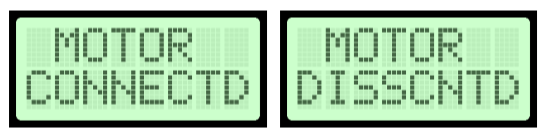
    
    
* Because the LCD display "flickers" when you update it too frequently, it is beneficial to wait about 100 milliseconds between updates to ensure the display can be read.  HOWEVER, using the command ```delay()``` to achieve this is UNACCEPTABLE in this application because it would mean the entire program STOPS processing for 100 ms.  If a fault occured in that time, the program would not be able to respond!  **Therefore, you will need to make use of a timer to output to the LCD at an interval of your choice without pausing the entire program.**

### *Controller Design:* Motor Inertia Module

You will be using the Inertial Module for this lab, but you won't be connecting the inertia mass to the motor yet.  Remove your gate module and reattach the Inertial Model using the two thumbscrews shown below Notice that the extension on the motor inertial shield contacts the shield limit switch when it is fully closed.

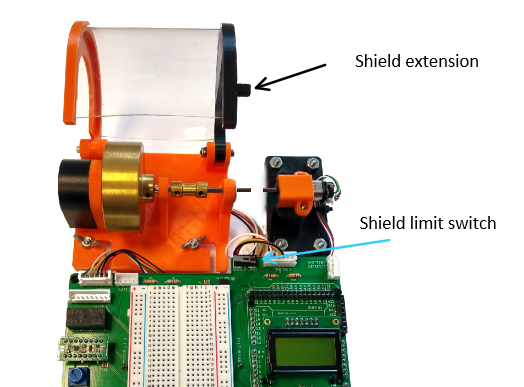

Confirm the motor is still connected to the MOTOR2 socket and the wires coming from the inertia module are connected to the MOTOR1 socket.  We won't use the electronics on the inertia module in this lab, but this will keep the wires away from the motor and get you set up for lab 4.

Use a "flex coupler" to attach the inertia shaft and the motor shaft together.  Make sure to align the flat part of the "D" shaft with the sockets in the coupler.  If the shaft cannot be inserted all the way, you may need to use a small screwdriver to clear any errant PLA material blocking it. 

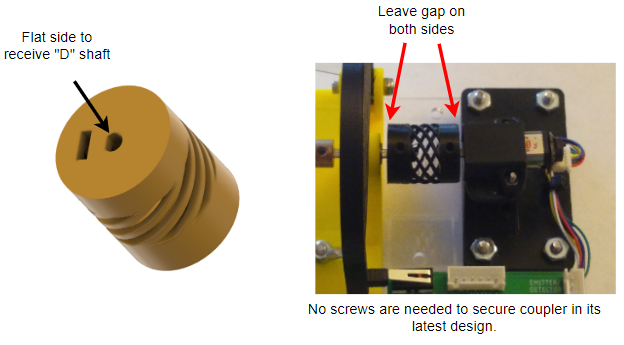

### *Controller Design:* Failsafe Relay

The same relay we used in lab 1 and 2 also connects the motor to the second H-bridge. So the same pin on the arduino will be used to control the relay to turn the motor on and off. 

A solid state switch, like a transistor, could have been used instead of a relay. However, as a safety feature, the relay is a better choice because the motor is physically disconnected from the circuit so there is no chance current could "leak" across the relay.  Solid state electronics can fail such that current can pass unexpectedly.  Additionally, a relay is less expensive, dissipates less heat, and allowes us to easily run current in both directions through the motor. A relay was also an appropriate choice because it is not expected to switch at high frequencies or for a large number of cycles over its design life cycle in this application. 

Finally, your relay is also designed to "FAIL SAFE" by staying in the open position, and stopping the motor, if it loses power.


## *Controller Design*: State Transition Diagram and Table

Because you are still developing an understanding of FSM design, you are provided a complete state transition diagram and *partial* table below.  


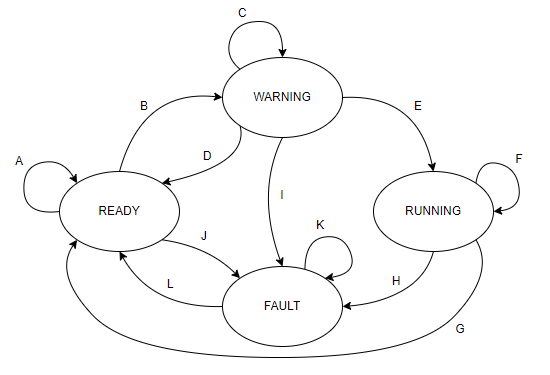

|Transition|Starting State|Transition Condition|Ending State|
|:---:|:---:|:---:|:---:|
|A|READY| (!(Run1 && Run2 && SlideToReady)\|\|!SlideToReady )&& !(Estop \|\| Limit) |READY|
|B|READY| Run1 && Run2 && SlideToReady && !(Estop \|\| Limit) |WARNING|
|C|WARNING| Run1 && Run2 && !WarningTimer && SlideToReady && !(Estop \|\| Limit)) |WARNING|
|D|WARNING|  |READY|
|E|WARNING| WarningTimer && SlideToReady && !(Estop \|\| Limit) |RUNNING|
|F|RUNNING| SlideToReady && !(Estop \|\| Limit) |RUNNING|
|G|RUNNING| !SlideToReady && !(Estop \|\| Limit) |READY|
|H|RUNNING|  |FAULT|
|I|WARNING|  |FAULT|
|J|READY|  |FAULT|
|K|FAULT| Estop \|\| Limit \|\| SlideToReady |FAULT|
|L|FAULT| |READY|


**Based on the State Transition Diagram, complete the State Transition Table for this system.  You can copy the table above into the graded Markdown cell below and just add the missing elements. Before you submit, ensure the diagram and table are consistent with your final program below.**

Note that the [pipe character](https://www.freecodecamp.org/news/how-to-type-the-vertical-line-bar-character-on-a-keyboard/#:~:text=The%20pipe%20character%20is%20not,right%20above%20the%20Enter%20key.&text=Another%20way%20to%20type%20the,1%2C%202%2C%20and%204.) "|" is used represent an OR in boolean logic as "||", but it is also used to define the size of the Markdown tables! If you put this in your markdown code, it will be interpreted as a table formatting command and create a very confused table!  

To tell the code that you just want to print the character exactly as you type it, place a backslash "\\" before each pipe character.  So to print "||" you would type "\\|\\|".

YOUR ANSWER HERE

## *Controller Validation:* Coding and Demonstration

**Using the 4 Block structure**, implement your controller design in Arduino code.  "If" statements are not used in Block 2 or 3, but are expected in Block 4.  Boolean algebra is used in Block 2 and 3 for clarity and efficiency.  

**Place your Arduino Code in the cell below using proper formatting (with \~\~\~c before and \~\~\~ after)**.

YOUR ANSWER HERE

**In order to test your design and confirm it is validated, record a video of you performing the following sequence of actions.  Make sure to NARRATE the steps you are being asked to take as you step through the demonstration.**

1. Begin with E-Stop deactivated,safety shield down, and reset the Arduino.
2. You should begin in *FAULT*. Clear the Fault state.
3. Show you are in the *READY* state and show the LCD display
4. With the slide switch still in **Stop/Safe**, press both **RUN** buttons.  You should not change states.
5. Move the slide switch to **Ready**.
6. Press one **RUN** button, release. Press the other **RUN** button and release. You should not change states
7. Press both **RUN** buttons to enter the *WARNING* state (Show change in LED).
8. WHILE in the *WARNING* state, and before 2 seconds passes, release one of the **RUN** buttons and show you return to the *READY* state.
9.  Return to the *WARNING* state, set the slide switch to **Stop/Safe**.  You should move into *READY*.
11. Return to the *WARNING* State and before 2 seconds passes press the **E-STOP** button.  You should move into *FAULT*.  
12. Reset the **E-Stop** button, move the slide switch to **Stop/Safe** and show you return to *READY*.
9. From the *READY* state, press both **RUN** buttons for 2 seconds to enter the *RUNNING* state (Show change in LED and the updated LCD Display).
10. While in the *RUNNING* state, set the slide switch to **Stop/Safe**.  You should move into *READY*.
11. Return to the *RUNNING* State and press the **E-STOP** button.  You should move into *FAULT*.  
12. Reset the **E-Stop** button, move the slide switch to **Stop/Safe** and show you return to *READY*.
13. Return to the *RUNNING* state.  Lift the safety shield and show you enter the *FAULT* state.
14. Clear the fault, move the slide switch to **Stop/Safe** and show you return to *READY*.

**Put a LINK to a video of your controller validation in the cell below.  You can use media.lafayette.edu, youtube, vimeo, etc. to host your video**

YOUR ANSWER HERE